In [1]:
import os
import shutil
import tensorflow as tf
import keras
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.densenet import decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import PIL

In [2]:
print ("I found a dataset containing roughly 70-90 images of every NBA player from the 2019-20 season on Kaggle. I added all 74 images of LeBron James to a repository titled 'LeBron' and then added roughly 150 images of random NBA players from the same dataset in a repository  titled 'Not_LeBron.' I then uploaded the two repositories to my folder here.")

I found a dataset containing roughly 70-90 images of every NBA player from the 2019-20 season on Kaggle. I added all 74 images of LeBron James to a repository titled 'LeBron' and then added roughly 150 images of random NBA players from the same dataset in a repository  titled 'Not_LeBron.' I then uploaded the two repositories to my folder here.


In [3]:
#This is how I brought in the images to this notebook.
# Input image dimensions, etc.
resized_height = 224
resized_width = 224
num_channel = 3
num_classes = 2
batch_size = 128

# Paths to images. These are too large to keep in the git repo. 
# Details of getting images ready are at the end of the notebook.
image_dir = '/blue/zoo4926/noahandersen/Assignments/Basketball'

In [4]:
#This is how the images were trained and validated.
train_images = image_dataset_from_directory(
    image_dir, labels='inferred', label_mode='binary',
     color_mode='rgb', batch_size=batch_size, image_size=(resized_height ,
    resized_width ), shuffle=True, seed=42, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)

valid_images = image_dataset_from_directory(
    image_dir, labels='inferred', label_mode='binary',
     color_mode='rgb', batch_size=batch_size, image_size=(resized_height ,
    resized_width ), shuffle=True, seed=42, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)

Found 253 files belonging to 2 classes.
Using 203 files for training.


2023-04-24 09:28:05.959357: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 253 files belonging to 2 classes.
Using 50 files for validation.


2023-04-24 09:28:08.964723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79125 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-04-24 09:28:08.968004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79125 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-04-24 09:28:08.971168: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 79125 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0
2023-04-24 09:28:08.974326: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 79125 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

In [5]:
#Setting up the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(resized_height, resized_width, num_channel)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 75)      2100      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 75)      300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 75)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 50)      33800     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 50)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 50)      200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 50)        0

In [25]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
history = model.fit(train_images, batch_size=batch_size, epochs=10, verbose=1, validation_data=valid_images)

Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 18.0042 - accuracy: 0.6601 - val_loss: 210.1685 - val_accuracy: 0.7400
Epoch 2/10
2/2 [==============================] - 6s 1s/step - loss: 28.5580 - accuracy: 0.5961 - val_loss: 56.1714 - val_accuracy: 0.3400
Epoch 3/10
2/2 [==============================] - 6s 1s/step - loss: 5.3215 - accuracy: 0.7635 - val_loss: 83.3053 - val_accuracy: 0.7600
Epoch 4/10
2/2 [==============================] - 6s 1s/step - loss: 1.6142 - accuracy: 0.8867 - val_loss: 35.1392 - val_accuracy: 0.7600
Epoch 5/10
2/2 [==============================] - 6s 1s/step - loss: 0.3046 - accuracy: 0.9310 - val_loss: 9.8417 - val_accuracy: 0.8200
Epoch 6/10
2/2 [==============================] - 6s 1s/step - loss: 0.1166 - accuracy: 0.9507 - val_loss: 20.3707 - val_accuracy: 0.7600
Epoch 7/10
2/2 [==============================] - 6s 1s/step - loss: 0.6562 - accuracy: 0.9409 - val_loss: 12.6256 - val_accuracy: 0.8000
Epoch 8/10
2/2 [================

In [ ]:
#We have roughly 78% accuracy.

['LeBron', 'Not_LeBron']
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


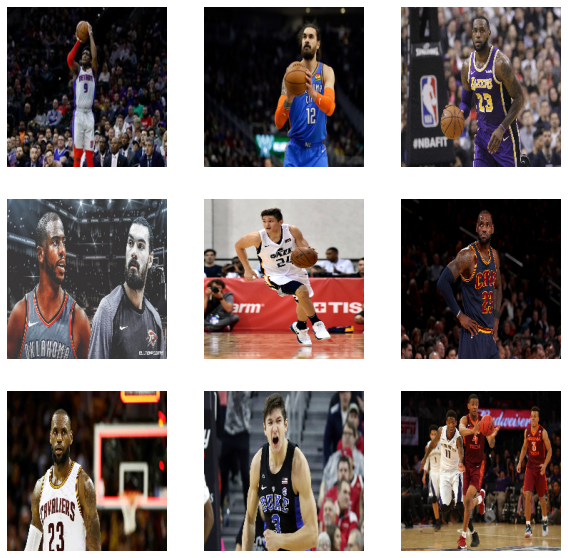

In [27]:
class_names = train_images.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)

In [ ]:
train_images.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [ ]:
from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(image_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [22]:
predictions = model.predict(valid_images).round()
true_label = np.concatenate([y for x, y in valid_images], axis=0)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_label,predictions)
print(cm)

[[ 0 12]
 [ 0 38]]


In [25]:
#We only had 12 false positives

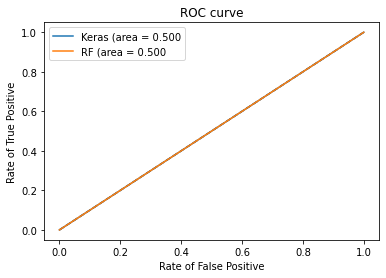

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, threshold_keras = roc_curve(true_label, predictions)
auc_rf = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f}'.format(auc_rf))
plt.plot(fpr_keras, tpr_keras, label='RF (area = {:.3f}'.format(auc_rf))
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [14]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [17]:
test_label = np.concatenate([y for x, y in valid_images], axis=0)

In [18]:
print(test_label)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
